In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
# Function to split strings into a list and remove empty strings
def split_to_list(cell):
    return [item.strip() for part in cell.split(',') for item in part.split('\n') if item.strip()]


In [13]:
df_all = pd.read_excel('PED_all_exp_entries.xlsx')
# create a custom header for easily programme handling
headers = ['ped_id', 'number_of_chains', 'protein_name', 'length_in_ped', 'uniprot_acc', 'length_in_uniprot', 'disorder_region_from_mobi', 'pdb_region','length_of_idr', 'class','exp_method','number_of_entangled_frames','total_frames', 'note'] 
# assign custom header to DataFrame
df_all.columns = headers
df = df_all[~df_all['class'].isin(['Not Classified', 'Fully Structured'])]
df

,ped_id,number_of_chains,protein_name,length_in_ped,uniprot_acc,length_in_uniprot,disorder_region_from_mobi,pdb_region,length_of_idr,class,exp_method,number_of_entangled_frames,total_frames,note
0,PED00001,1.0,Protein SIC1,92.0,P38634,284,"([1, 231], [261, 284])","[1, 90]","[90, 0]",Fully IDP,NMR,4.0,32.0,NaN
1,PED00002_A,NaN,Heat shock protein beta-6,104.0,O14558,160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
2,PED00002_B,NaN,Heat shock protein beta-6,104.0,O14558,160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
3,PED00003,1.0,Beta-synuclein,134.0,Q16143,134,"([1, 134],)","(1, 134)",[134],Fully IDP,NMR,46.0,575.0,NaN
4,PED00004,1.0,Cyclin-dependent kinase inhibitor 1B,69.0,O43806,158,"([1, 158],)","(25, 93)",[69],Fully IDP,NMR,0.0,130.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,PED00419_A,NaN,SH3 domain-containing kinase-binding protein 1,75.0,Q96B97,665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
515,PED00419_B,NaN,SH3 domain-containing kinase-binding protein 1,75.0,Q96B97,665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
516,PED00419_C,NaN,SH3 domain-containing kinase-binding protein 1,75.0,Q96B97,665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
519,PED00421,1.0,FXYD2,64.0,P54710-2,64,[ID does not exist in Database],NaN,NaN,Fully IDP,NMR,0.0,10.0,manually assigned


In [ ]:
# create categories and filter out from original data
fully_IDP = df[df['class']=='Fully IDP']
long_IDR = df[df['class']=='Long IDR']
short_IDR = df[df['class']=='Short IDR']
fully_structure = df[df['class']=='Fully Structured']
not_classified = df[df['class']=='Not Classified']

In [14]:
df['uniprot_acc'] = df['uniprot_acc'].apply(split_to_list)
df

/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_29925/1383348510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uniprot_acc'] = df['uniprot_acc'].apply(split_to_list)


,ped_id,number_of_chains,protein_name,length_in_ped,uniprot_acc,length_in_uniprot,disorder_region_from_mobi,pdb_region,length_of_idr,class,exp_method,number_of_entangled_frames,total_frames,note
0,PED00001,1.0,Protein SIC1,92.0,[P38634],284,"([1, 231], [261, 284])","[1, 90]","[90, 0]",Fully IDP,NMR,4.0,32.0,NaN
1,PED00002_A,NaN,Heat shock protein beta-6,104.0,[O14558],160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
2,PED00002_B,NaN,Heat shock protein beta-6,104.0,[O14558],160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
3,PED00003,1.0,Beta-synuclein,134.0,[Q16143],134,"([1, 134],)","(1, 134)",[134],Fully IDP,NMR,46.0,575.0,NaN
4,PED00004,1.0,Cyclin-dependent kinase inhibitor 1B,69.0,[O43806],158,"([1, 158],)","(25, 93)",[69],Fully IDP,NMR,0.0,130.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,PED00419_A,NaN,SH3 domain-containing kinase-binding protein 1,75.0,[Q96B97],665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
515,PED00419_B,NaN,SH3 domain-containing kinase-binding protein 1,75.0,[Q96B97],665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
516,PED00419_C,NaN,SH3 domain-containing kinase-binding protein 1,75.0,[Q96B97],665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
519,PED00421,1.0,FXYD2,64.0,[P54710-2],64,[ID does not exist in Database],NaN,NaN,Fully IDP,NMR,0.0,10.0,manually assigned


In [15]:
for uniprots in df['uniprot_acc']:
    print(uniprots)

['P38634']
['O14558']
['O14558']
['Q16143']
['O43806']
['O14558']
['O14558']
['Q16143', 'P37840', 'Q16143']
['O14558']
['O14558']
['O14558']
['O14558']
['P12296']
['Q5L4K5']
['P12296']
['Q8XAD5']
['P38634']
['P12296']
['Q15004']
['P10636-8']
['O14558']
['O14558']
['Q89933']
['O14558']
['O14558']
['O14558']
['O14558']
['Q08012']
['P38634']
['P37840']
['Q5L4K5']
['P12296']
['P04156']
['P04156']
['Q00987']
['Q07817']
['P04637', 'P45481']
['P45481', 'P04637']
['P45481', 'P04637']
['P02751']
['P02751']
['P02751']
['P04156']
['P04156']
['P63316']
['P63316']
['P63316']
['P63316']
['O26309']
['O26309']
['O75475', 'Q7Z3K3']
['O75475']
['P06766']
['P06766']
['P09874']
['P09874']
['P09874']
['P02655']
['P02655']
['P02655']
['P04631']
['P04631']
['P04637']
['P04637']
['P04637']
['Q92793']
['P12497']
['P12497']
['P04972']
['Q16987']
['Q16987']
['K4MTL7']
['K4MTL7']
['Q1I128']
['P35414']
['P35414']
['P35414']
['P35414']
['P32776']
['P07276']
['P32776']
['P32776']
['P32776']
['Q13351']
['P01215']
['P

# Counting statistic

In [17]:
# create categories and filter out from original data
fully_IDP = df[df['class']=='Fully IDP']
long_IDR = df[df['class']=='Long IDR']
short_IDR = df[df['class']=='Short IDR']
fully_structure = df[df['class']=='Fully Structured']
not_classified = df[df['class']=='Not Classified']

# count how many entries in each category
print(f"There are {len(df)} in this Database")
print(f"There are {len(fully_structure)} that are fully structured")
print(f"There are {len(fully_IDP)} that are fully IDP")
print(f"There are {len(long_IDR)} that are Long IDR")
print(f"There are {len(short_IDR)} that are Short IDR")
print(f"There are {len(not_classified)} that are not classified")


There are 416 in this Database
There are 0 that are fully structured
There are 77 that are fully IDP
There are 191 that are Long IDR
There are 148 that are Short IDR
There are 0 that are not classified


In [16]:
# Number of unique
list_of_uniprot = [item for uniprots in df['uniprot_acc'] for item in uniprots]
print(len(set(list_of_uniprot)))

248


In [18]:
# Count how many entries with at least one entangled conformations
print("Number of entries with at least 1 entangled conformation:")
print(f"Fully IDP: {len(fully_IDP[fully_IDP['number_of_entangled_frames']>0])}")
print(f"Long IDR: {len(long_IDR[long_IDR['number_of_entangled_frames']>0])}")
print(f"short IDR: {len(short_IDR[short_IDR['number_of_entangled_frames']>0])}")

Number of entries with at least 1 entangled conformation:
Fully IDP: 40
Long IDR: 111
short IDR: 48


## Plot ensemble ranking for Fully IDP

In [27]:
fully_IDP['entangled_population'] = fully_IDP['number_of_entangled_frames']/fully_IDP['total_frames']
fully_IDP_sorted = fully_IDP.sort_values(by='entangled_population', ascending=False)
# Reset the index and drop the old index
fully_IDP_sorted = fully_IDP_sorted.reset_index(drop=True)

/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_29925/2492350334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_IDP['entangled_population'] = fully_IDP['number_of_entangled_frames']/fully_IDP['total_frames']


In [50]:
# matplotlib setting
base_fontsize = 14

<IPython.core.display.Javascript object>


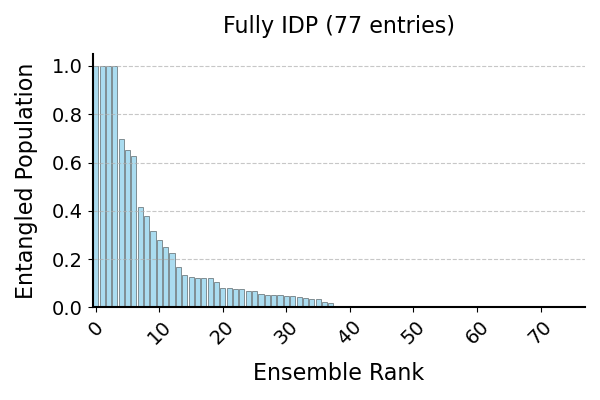

In [49]:

# Example DataFrame fully_IDP_sorted should be defined before this code
plt.figure(figsize=(6, 4))  # Increase figure size for better clarity
plt.bar(range(len(fully_IDP_sorted.index)), fully_IDP_sorted['entangled_population'], 
        color='skyblue', 
        edgecolor='black',     
        linewidth=0.4,          # Thin edge lines
        width=0.8,              # Slightly reduce bar width
        alpha=0.7               # Add transparency)
       )
# Reduce space between bars and y-axis
plt.xlim(-0.5, len(fully_IDP_sorted.index))  # Start slightly left of the first bar
# Axis labels
plt.xlabel('Ensemble Rank', fontsize=base_fontsize+2, labelpad=10)
plt.ylabel('Entangled Population', fontsize=base_fontsize+2, labelpad=10)

# Title
plt.title('Fully IDP (77 entries)', fontsize=base_fontsize+2, pad=15)

# Customize x-axis ticks
plt.xticks(range(0, len(fully_IDP_sorted.index), 10), 
           fully_IDP_sorted.index[::10], fontsize=base_fontsize, rotation=45, ha='center')

# Customize y-axis ticks
plt.yticks(fontsize=base_fontsize)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make remaining borders thicker
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Adjust layout for spacing
plt.tight_layout()

# Show or save the plot
plt.show()
# Uncomment below to save the figure
plt.savefig('entangled_population_fully_idp.png', dpi=600, bbox_inches='tight')

## Plot ensemble ranking for Long IDR

In [33]:
long_IDR['entangled_population'] = long_IDR['number_of_entangled_frames']/long_IDR['total_frames']
long_IDR_sorted = long_IDR.sort_values(by='entangled_population', ascending=False)
long_IDR_sorted = long_IDR_sorted.reset_index(drop=True)

/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_29925/2989689096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_IDR['entangled_population'] = long_IDR['number_of_entangled_frames']/long_IDR['total_frames']


<IPython.core.display.Javascript object>


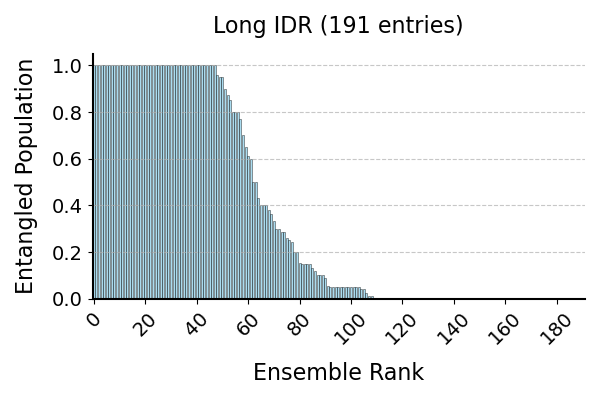

In [51]:

# Plot for Long IDR
plt.figure(figsize=(6, 4))  # Set figure size
plt.bar(range(len(long_IDR_sorted.index)), long_IDR_sorted['entangled_population'], 
        color='skyblue', 
        edgecolor='black',     
        linewidth=0.4,          # Thin edge lines
        width=0.8,              # Slightly reduce bar width
        alpha=0.7               # Add transparency)
       )
# Reduce space between bars and y-axis
plt.xlim(-0.5, len(long_IDR_sorted.index))  # Start slightly left of the first bar

# Axis labels
plt.xlabel('Ensemble Rank', fontsize=base_fontsize+2, labelpad=10)
plt.ylabel('Entangled Population', fontsize=base_fontsize+2, labelpad=10)

# Title
plt.title('Long IDR (191 entries)', fontsize=base_fontsize+2, pad=15)

# Customize x-axis ticks
plt.xticks(range(0, len(long_IDR_sorted.index), 20), 
           long_IDR_sorted.index[::20], fontsize=base_fontsize, rotation=45, ha='center')

# Customize y-axis ticks
plt.yticks(fontsize=base_fontsize)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make remaining borders thicker
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Adjust layout for spacing
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
plt.savefig('entangled_population_long_idr.png', dpi=600, bbox_inches='tight')

## Plot ensemble ranking for Short IDR

In [47]:
short_IDR['entangled_population'] = short_IDR['number_of_entangled_frames']/short_IDR['total_frames']
short_IDR_sorted = short_IDR.sort_values(by='entangled_population', ascending=False)
short_IDR_sorted = short_IDR_sorted.reset_index(drop=True)

/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_29925/1112504126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_IDR['entangled_population'] = short_IDR['number_of_entangled_frames']/short_IDR['total_frames']


<IPython.core.display.Javascript object>


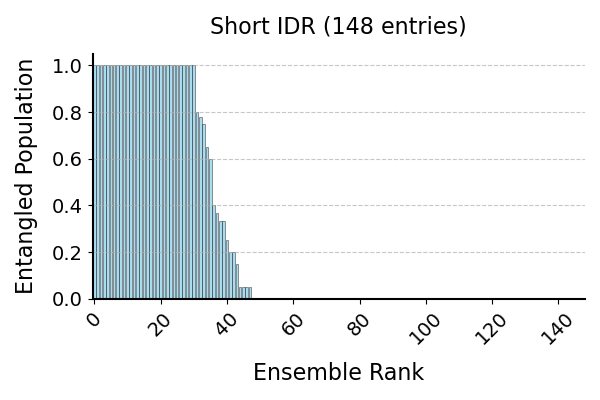

In [52]:
# Plot for Short IDR
plt.figure(figsize=(6, 4))  # Set figure size
plt.bar(range(len(short_IDR_sorted.index)), short_IDR_sorted['entangled_population'], 
        color='skyblue', 
        edgecolor='black',     
        linewidth=0.4,          # Thin edge lines
        width=0.8,              # Reduce bar width for better spacing
        alpha=0.7               # Add transparency
       )

# Reduce space between bars and y-axis
plt.xlim(-0.5, len(short_IDR_sorted.index))  # Start slightly left of the first bar

# Axis labels
plt.xlabel('Ensemble Rank', fontsize=base_fontsize+2, labelpad=10)
plt.ylabel('Entangled Population', fontsize=base_fontsize+2, labelpad=10)

# Title
plt.title('Short IDR (148 entries)', fontsize=base_fontsize+2, pad=15)

# Customize x-axis ticks (every 10 or 20 entries for better readability)
plt.xticks(range(0, len(short_IDR_sorted.index), 20), 
           short_IDR_sorted.index[::20], fontsize=base_fontsize, rotation=45, ha='center')

# Customize y-axis ticks
plt.yticks(fontsize=base_fontsize)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make remaining borders thicker
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Adjust layout for spacing
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
plt.savefig('entangled_population_short_idr.png', dpi=600, bbox_inches='tight')
